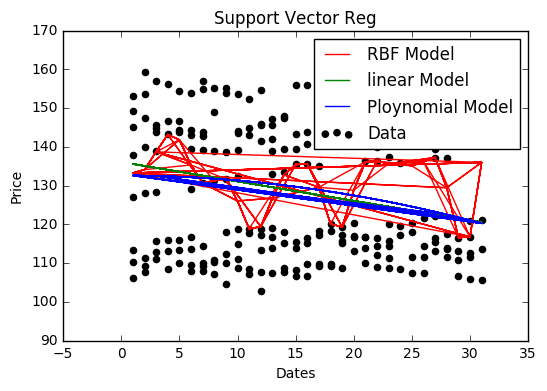

(116.55005759091594, 121.53095237961622, 121.78784633536321)


In [8]:
%matplotlib inline
from matplotlib import pylab
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
dates = []
prices = []
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return
def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1))

    svr_lin = SVR(kernel= 'linear', C=1e3)
    svr_poly = SVR(kernel= 'poly', C=1e3, degree= 2)
    svr_rbf = SVR(kernel= 'rbf', C=1e3, gamma=0.1)

    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates,
                prices,
                color="black",
                label="Data")
    plt.plot(dates,
             svr_rbf.predict(dates),
             color="red",
             label="RBF Model")

    plt.plot(dates,
             svr_lin.predict(dates),
             color="green",
             label='linear Model')

    plt.plot(dates,
             svr_poly.predict(dates),
             color="blue",
             label="Ploynomial Model")

    plt.xlabel('Dates')
    plt.ylabel('Price')
    plt.title('Support Vector Reg')
    plt.legend()
    plt.show()

    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

get_data('aapl.csv')
predicted_prices = predict_prices(dates, prices, 29)
print predicted_prices